In [1]:
from data_transformation import *
import pandas as pd
from model import *

/var/folders/t4/g2w87qw154j05sg7m8hh2nx00000gn/T/ipykernel_14092/465431426.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("Customer-Churn-Records.csv")
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [8]:
data[(data['Exited']==1) & (data['Complain']==1)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
22,510,Spain,Female,38,4,0.00,1,1,0,118913.53,1,1,2,DIAMOND,887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1,1,3,GOLD,790
9982,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1,1,4,GOLD,591
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1,1,3,GOLD,369
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564


In [3]:
y = data['Exited']
X = data.drop('Exited',axis=1)

# With All Features

In [4]:
input = data_transformation(X)

/Users/renyue/Desktop/Cornell/course/Spring 2024/5741/ORIE_5741_Final_Project/data_transformation.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return X.replace("DIAMOND",1).replace("PLATINUM",0.75).replace("GOLD", 0.5).replace("SILVER",0.25)
/Users/renyue/Desktop/Cornell/course/Spring 2024/5741/ORIE_5741_Final_Project/data_transformation.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return X.replace("DIAMOND",1).replace("PLATINUM",0.75).replace("GOLD", 0.5).replace("SILVER",0.25)


In [ ]:
coefs = Logistic(input,y)

In [6]:
d = {}
cols = ['Age','Tenure','NumOfProducts','Satisfaction Score','Balance','EstimatedSalary','Point Earned','CreditScore','France','Germany','Spain','Gender','Card Type','HasCrCard','IsActiveMember','Complain']
for col, coef in zip(cols, coefs[0]):
    d[col] = round(coef,3)

In [7]:
d

{'Age': 5.452,
 'Tenure': -0.106,
 'NumOfProducts': -0.454,
 'Satisfaction Score': -0.05,
 'Balance': 0.612,
 'EstimatedSalary': 0.076,
 'Point Earned': -0.194,
 'CreditScore': -0.342,
 'France': -0.736,
 'Germany': 0.019,
 'Spain': -0.709,
 'Gender': -0.542,
 'Card Type': 0.054,
 'HasCrCard': -0.04,
 'IsActiveMember': -1.037}

In [8]:
result = pd.DataFrame(data=d, index=[0])

### Random Forest

In [4]:
input = data_transformation(X)
rf_importance = rf(input,y)
input.shape

/Users/renyue/Desktop/Cornell/course/Spring 2024/5741/ORIE_5741_Final_Project/data_transformation.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return X.replace("DIAMOND",1).replace("PLATINUM",0.75).replace("GOLD", 0.5).replace("SILVER",0.25)
/Users/renyue/Desktop/Cornell/course/Spring 2024/5741/ORIE_5741_Final_Project/data_transformation.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return X.replace("DIAMOND",1).replace("PLATINUM",0.75).replace("GOLD", 0.5).replace("SILVER",0.25)


0.9962732919254659
[[1596    2]
 [   1  401]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1598
           1       1.00      1.00      1.00       402

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



(10000, 16)

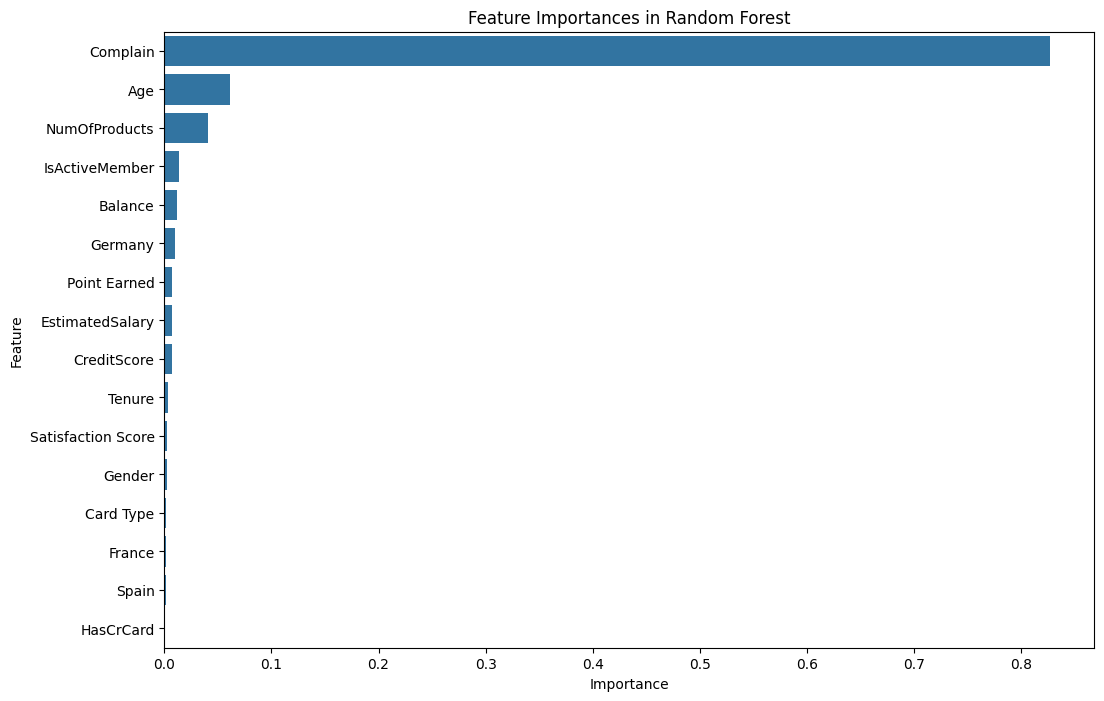

In [6]:
rf_featrues = ['Age','Tenure','NumOfProducts','Satisfaction Score','Balance','EstimatedSalary','Point Earned','CreditScore','France','Germany','Spain','Gender','Card Type','HasCrCard','IsActiveMember','Complain']
interpret_rf(rf_importance,rf_featrues)

# Without Complain

### Logistic Regression

In [4]:
X_droped_complain = X.drop('Complain',axis=1)
input = data_transformation(X_droped_complain)

/Users/renyue/Desktop/Cornell/course/Spring 2024/5741/ORIE_5741_Final_Project/data_transformation.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return X.replace("DIAMOND",1).replace("PLATINUM",0.75).replace("GOLD", 0.5).replace("SILVER",0.25)
/Users/renyue/Desktop/Cornell/course/Spring 2024/5741/ORIE_5741_Final_Project/data_transformation.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return X.replace("DIAMOND",1).replace("PLATINUM",0.75).replace("GOLD", 0.5).replace("SILVER",0.25)


In [10]:
coefs = Logistic(input,y)

auc:0.7735743309513801
best f1:0.5093945720250522
best_threshold:0.26304305266972683


### Random Forest

In [6]:
rf_importance = rf(input,y)

0.5954198473282443
[[1540   40]
 [ 225  195]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1580
           1       0.83      0.46      0.60       420

    accuracy                           0.87      2000
   macro avg       0.85      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=288; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=288; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=288; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=288; total time=   0.0s
[CV] END bootstrap=T

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
175 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
58 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12

0.6116941529235382
[[1537   43]
 [ 216  204]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1580
           1       0.83      0.49      0.61       420

    accuracy                           0.87      2000
   macro avg       0.85      0.73      0.77      2000
weighted avg       0.87      0.87      0.86      2000



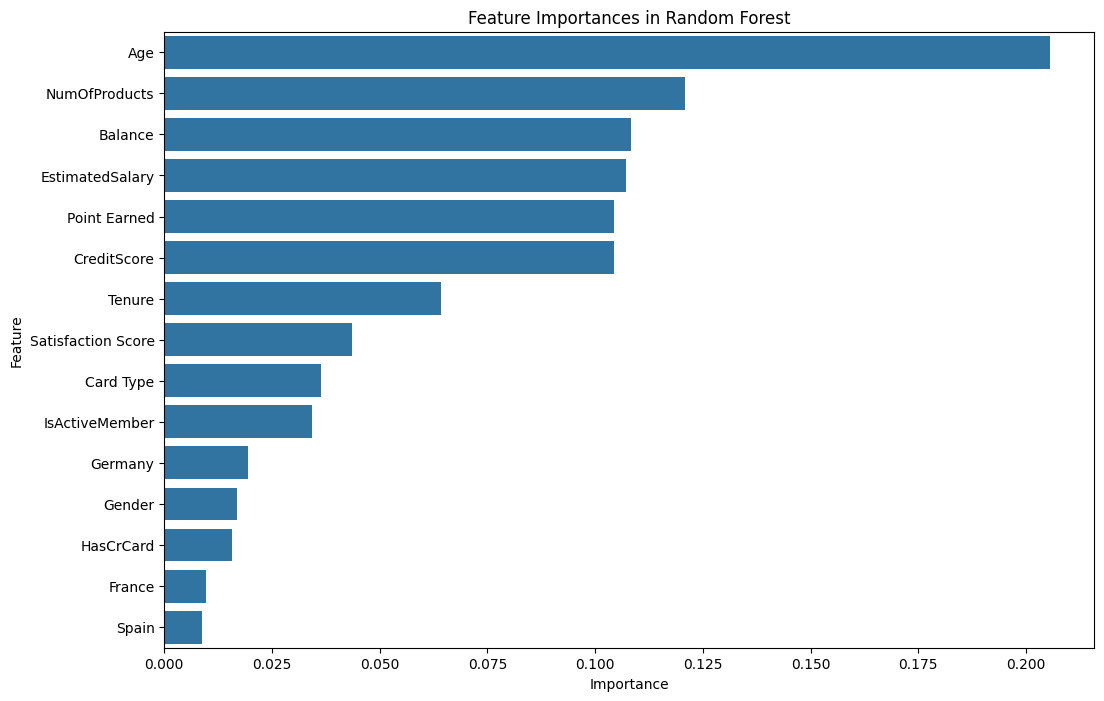

In [9]:
rf_featrues = ['Age','Tenure','NumOfProducts','Satisfaction Score','Balance','EstimatedSalary','Point Earned','CreditScore','France','Germany','Spain','Gender','Card Type','HasCrCard','IsActiveMember']
interpret_rf(rf_importance,rf_featrues)

### XGboost

In [14]:
xgboost(input,y)

0.6253687315634219
